In [1]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import random

In [2]:
data=pd.read_csv('train.csv')
X=data.drop('label',axis=1)
X=X/255
y=data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [3]:
split=[1,3,5,7]
lrs=[]
m=[]
for i in split:
    j=0
    lit=list(range(0, X_train.shape[0],int(X_train.shape[0]/i)))
    lit=lit+[X_train.shape[0]]
    ytotal=pd.DataFrame(data.label[0:X_test.shape[0]])
    while j<i:
        lr=LogisticRegression(random_state=0,max_iter=10000)
        lr.fit(X_train[lit[j]:lit[j+1]],y_train[lit[j]:lit[j+1]])
        yt=lr.predict(X_test)
        ytotal['j']=yt
        print('Done '+ str(j+1) + ' of split-'+str(i) )
        lrs=lrs+[lr.score(X_test,y_test)]
        j=j+1
    ytotal=ytotal.drop('label',axis=1)   
    ymode=ytotal.mode(axis=1)
    yp=ymode.iloc[:,0]
    m=m+[confusion_matrix(y_test,yp).trace()/(X_test.shape[0])]
    print('Done Split-'+str(i))

Done 1 of split-1
Done Split-1
Done 1 of split-3
Done 2 of split-3
Done 3 of split-3
Done Split-3
Done 1 of split-5
Done 2 of split-5
Done 3 of split-5
Done 4 of split-5
Done 5 of split-5
Done Split-5
Done 1 of split-7
Done 2 of split-7
Done 3 of split-7
Done 4 of split-7
Done 5 of split-7
Done 6 of split-7
Done 7 of split-7
Done Split-7


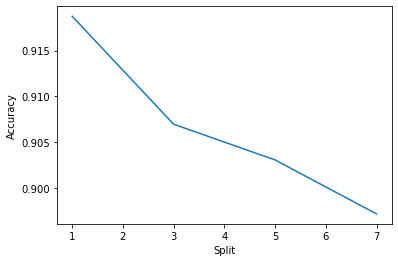

In [4]:
plt.plot(split,m)
plt.xlabel('Split')
plt.ylabel('Accuracy')
m1=m

In [5]:
def redu(x):
    m=x.shape[0]
    sig=np.dot(x.T,x)/m
    u,s,vh=np.linalg.svd(sig,full_matrices=True)
    i=0
    ts=sum(s)
    while i<len(s):
        sr= sum(s[0:i+1])*100/ts
        if sr>99:
            return u[:,0:i+1]
        i=i+1
    return u

In [6]:
split=[3,5,7]
lrs=[]
m=[]
for i in split:
    j=0
    lit=list(range(0, X_train.shape[0],int(X_train.shape[0]/i)))
    lit=lit+[X_train.shape[0]]
    ytotal=pd.DataFrame(data.label[0:X_test.shape[0]])
    while j<i:
        lr=LogisticRegression(random_state=0,max_iter=10000)
        ur=redu(X_train[lit[j]:lit[j+1]])
        zt=np.dot(X_train[lit[j]:lit[j+1]],ur)
        lr.fit(zt,y_train[lit[j]:lit[j+1]])
        xt=np.dot(X_test,ur)
        yt=lr.predict(xt)
        ytotal['j']=yt
        print('Done '+ str(j+1) + ' of split-'+str(i) )
        lrs=lrs+[lr.score(xt,y_test)]
        j=j+1
    ytotal=ytotal.drop('label',axis=1)   
    ymode=ytotal.mode(axis=1)
    yp=ymode.iloc[:,0]
    m=m+[confusion_matrix(y_test,yp).trace()/(X_test.shape[0])]
    print('Done Split-'+str(i))

Done 1 of split-3
Done 2 of split-3
Done 3 of split-3
Done Split-3
Done 1 of split-5
Done 2 of split-5
Done 3 of split-5
Done 4 of split-5
Done 5 of split-5
Done Split-5
Done 1 of split-7
Done 2 of split-7
Done 3 of split-7
Done 4 of split-7
Done 5 of split-7
Done 6 of split-7
Done 7 of split-7
Done Split-7


Text(0, 0.5, 'Accuracy')

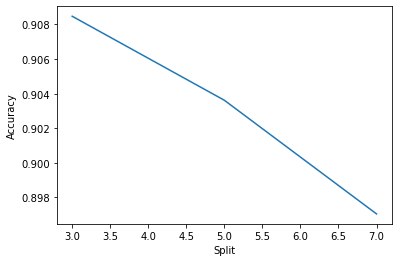

In [7]:
plt.plot(split,m)
plt.xlabel('Split')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

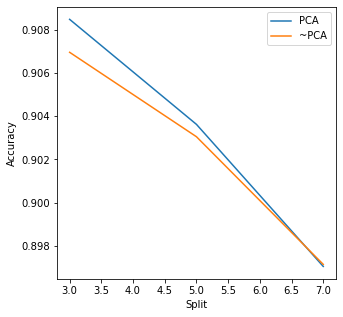

In [8]:
plt.figure(figsize = (5,5))
plt.plot(split,m)
plt.plot(split,m1[1:])
plt.legend(["PCA", "~PCA"], loc ="upper right")
plt.xlabel('Split')
plt.ylabel('Accuracy')

In [9]:
xn=X_train.iloc[0:24000,:]
z1=redu(xn)
z=np.dot(xn,z1)
lr=LogisticRegression(random_state=0,max_iter=10000)
lr.fit(z,y_train[0:24000])
yp=lr.predict(np.dot(X_test,z1))
confusion_matrix(y_test,yp).trace()/(X_test.shape[0])

0.9182857142857143